# 1. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# 2. Mounting Drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Reading data and converting it into a dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BRACU/Research/Thesis Supervision/Automated Health Monitoring System/Automated Health Monitoring System.csv')
df.head()

,Person,Name,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph,ECG Min,Condition
0,1,NaN,Male,32,174,96,31.708284,67,100,0.99,1,0,NaN,Normal
1,2,NaN,Male,38,189,87,24.355421,100,102,0.91,1,1,NaN,Covid
2,3,NaN,Female,45,185,110,32.140248,94,97,0.93,1,0,NaN,tachycardia
3,4,NaN,Female,60,195,104,27.350427,69,99,1.00,1,0,NaN,Fever
4,5,NaN,Male,41,149,61,27.476240,115,105,0.97,1,0,NaN,Fever


# 4.1 Preprocessing: Dropping Unused Column

In [ ]:
df=df.drop("Name", axis=1)
df=df.drop("Person", axis=1)
df=df.drop("ECG Min", axis=1)

df

,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph,Condition
0,Male,32,174,96,31.708284,67,100,0.99,1,0,Normal
1,Male,38,189,87,24.355421,100,102,0.91,1,1,Covid
2,Female,45,185,110,32.140248,94,97,0.93,1,0,tachycardia
3,Female,60,195,104,27.350427,69,99,1.00,1,0,Fever
4,Male,41,149,61,27.476240,115,105,0.97,1,0,Fever
...,...,...,...,...,...,...,...,...,...,...,...
109,Female,37,150,70,31.111111,81,97,0.98,1,0,Normal
110,Female,43,146,157,73.653594,86,88,0.94,1,1,Hypothermia
111,Male,34,190,135,37.396122,89,89,0.93,1,1,Hypothermia
112,Female,25,192,90,24.414062,67,99,0.99,1,0,Normal


# 5. Data Visualization

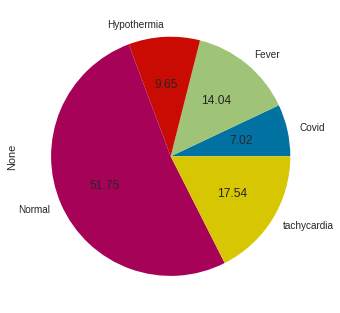

In [ ]:
df.groupby('Condition').size().plot(kind='pie', autopct='%.2f', y=None)

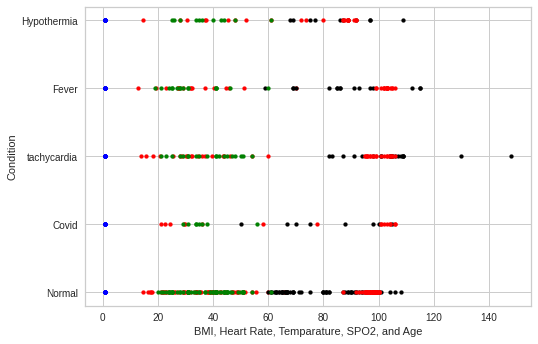

In [ ]:
plt.xlabel("BMI, Heart Rate, Temparature, SPO2, and Age")
plt.ylabel("Condition")

plt.scatter(df["BMI"],df["Condition"],c="red", s=15)
plt.scatter(df["Heart Rate"],df["Condition"],c="black", s=15)
plt.scatter(df["Temparature"],df["Condition"],c="red", s=15)
plt.scatter(df["SPO2"],df["Condition"],c="blue", s=15)
plt.scatter(df["Age"],df["Condition"],c="green", s=15)

# 4.2 Encoding Categorical Variables using Ordinal Encoder

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()

df = MultiColumnLabelEncoder(columns = df.columns).fit_transform(df)
df= df.apply(LabelEncoder().fit_transform)

In [ ]:
df

,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph,Condition
0,1,12,27,28,48,9,13,9,1,0,3
1,1,18,41,22,22,36,15,1,1,1,0
2,0,25,37,39,50,30,10,3,1,0,4
3,0,34,47,33,27,11,12,10,1,0,1
4,1,21,8,6,29,45,18,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
109,0,17,9,13,46,18,10,8,1,0,3
110,0,23,6,66,111,22,2,4,1,1,2
111,1,14,42,55,66,25,3,3,1,1,2
112,0,6,44,25,23,9,12,9,1,0,3


# 6. Training Data: Train-Test Split

In [ ]:
y = df['Condition']
X = df[df.columns]
X = X.drop(['Condition'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [ ]:
X

,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph
0,1,12,27,28,48,9,13,9,1,0
1,1,18,41,22,22,36,15,1,1,1
2,0,25,37,39,50,30,10,3,1,0
3,0,34,47,33,27,11,12,10,1,0
4,1,21,8,6,29,45,18,7,1,0
...,...,...,...,...,...,...,...,...,...,...
109,0,17,9,13,46,18,10,8,1,0
110,0,23,6,66,111,22,2,4,1,1
111,1,14,42,55,66,25,3,3,1,1
112,0,6,44,25,23,9,12,9,1,0


In [ ]:
y

0      3
1      0
2      4
3      1
4      1
      ..
109    3
110    2
111    2
112    3
113    2
Name: Condition, Length: 114, dtype: int64

# 7. Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determining the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.03402386, 0.03332613, 0.        , 0.04889301, 0.01921116,
       0.11932786, 0.43730965, 0.22526905, 0.00382932, 0.29041004])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

#This shows that temperature, heart rate and SPO2 are the most important factors in our training

Temparature    0.437310
ECG Graph      0.290410
SPO2           0.225269
Heart Rate     0.119328
Weight         0.048893
Gender         0.034024
Age            0.033326
BMI            0.019211
Motion         0.003829
Height         0.000000
dtype: float64

# 8.1 ML Model: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**{"max_features": 0.3, "n_estimators":100,"min_samples_leaf": 0.01,"random_state":50},oob_score= True)
rf.fit(X, y)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support

print("TRAINING ACCURACY OF THE Random-Forest Classifier: ", metrics.accuracy_score(y_train, y_pred_train)*100,"%")
print("TESTING ACCURACY OF THE Random-Forest Classifier: ", metrics.accuracy_score(y_test, y_pred_test)*100,"%")

from yellowbrick.classifier import ROCAUC
print("Out of Bag Score in RandomForest: ",rf.oob_score_)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_test, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_test, average='micro'))

print(precision_recall_fscore_support(y_test, y_pred_test, average='macro'))

TRAINING ACCURACY OF THE Random-Forest Classifier:  94.9367088607595 %
TESTING ACCURACY OF THE Random-Forest Classifier:  97.14285714285714 %
Out of Bag Score in RandomForest:  0.7719298245614035
Precision: 0.9714285714285714
Recall: 0.9714285714285714
(0.9913043478260869, 0.95, 0.9669841269841271, None)


# 8.2 ML Model:  K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=7)
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
print("Cross validation Score:", cross_val_score(knnclassifier, X, y, cv=2, scoring ='accuracy').mean())

print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

Cross validation Score: 0.42105263157894735
Accuracy Score: 0.5714285714285714
Precision: 0.5714285714285714
Recall: 0.5714285714285714
(0.35, 0.39545454545454545, 0.36913043478260865, None)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8.3 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
print('R2 Score of THE Decision-Tree MODEL: ', r2_score(y_test, y_pred)*100)

print("Cross validation Score:", cross_val_score(dt, X, y, cv=2, scoring ='accuracy').mean())

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))


R2 Score of THE Decision-Tree MODEL:  29.53020134228189
Cross validation Score: 0.7105263157894737
Precision: 0.6857142857142857
Recall: 0.6857142857142857
(0.5216666666666667, 0.5136363636363637, 0.4847619047619047, None)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
